In [1]:
#Importation cell
import pandas as pd
import numpy as np

In [2]:
#loading the data
data = './lichess_puzzle_transformed.csv.zst'

df = pd.read_csv(data, compression='zstd')

df_chunk = df.iloc[:10000]
df.head()


,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags
0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1940,75,94,6608,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,NaN
1,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1447,73,96,28501,advantage endgame short,https://lichess.org/F8M8OS71#53,NaN
2,0008Q,8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64,e7f7 f5e5 e2f1 e5e6,1311,75,90,605,advantage endgame rookEndgame short,https://lichess.org/MQSyb3KW#127,NaN
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4,1099,74,87,571,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#32,Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Vari...
4,000VW,r4r2/1p3pkp/p5p1/3R1N1Q/3P4/8/P1q2P2/3R2K1 b -...,g6f5 d5c5 c2e4 h5g5 g7h8 g5f6,2724,90,92,63,crushing endgame long,https://lichess.org/e9AY2m5j/black#50,NaN


Our data looks obviously raw, lol.There will be a lot of preprocessing steps that I will take here!


In [3]:
#Dropping the cells that are not needed
new_df = df_chunk.drop(['OpeningTags', 'PuzzleId'], axis=1)

In [4]:
new_df.head()

,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl
0,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1940,75,94,6608,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48
1,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1447,73,96,28501,advantage endgame short,https://lichess.org/F8M8OS71#53
2,8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64,e7f7 f5e5 e2f1 e5e6,1311,75,90,605,advantage endgame rookEndgame short,https://lichess.org/MQSyb3KW#127
3,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4,1099,74,87,571,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#32
4,r4r2/1p3pkp/p5p1/3R1N1Q/3P4/8/P1q2P2/3R2K1 b -...,g6f5 d5c5 c2e4 h5g5 g7h8 g5f6,2724,90,92,63,crushing endgame long,https://lichess.org/e9AY2m5j/black#50


Obviously, I have to add features so that my model will understand the features and relationships well!

In [5]:
#pip install python-chess ---------run this line if you don't have python-chess
import chess 
import requests


# Data Preprocessing!

In [6]:
import chess
from tqdm import tqdm

# Function to get FEN after the first move in the 'Moves' column
def get_fen_after_first_move(fen, moves_str):
    board = chess.Board(fen)  # Create board from FEN
    moves = moves_str.split()  # Split moves into list
    if moves:
        move = moves[0]  # Get the first move
        try:
            board.push_san(move)  # Play the move on the board
            return board.fen()  # Return the new FEN after the move
        except ValueError:
            print(f"Invalid move: {move} for FEN: {fen}")
            return fen  # Return original FEN if move is invalid
    return fen  # Return original FEN if no moves are found

tqdm.pandas()  # Enable progress tracking so i can know what is going on

# Use progress_apply to track the progress of the operation
new_df['FEN_After_First_Move'] = new_df.progress_apply(lambda row: get_fen_after_first_move(row['FEN'], row['Moves']), axis=1)

# Printing the first few rows to verify that what i have done worked
print(new_df[['FEN', 'Moves', 'FEN_After_First_Move']].head())

100%|██████████| 10000/10000 [00:01<00:00, 6103.07it/s]


                                                 FEN  \
0  r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...   
1  5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...   
2       8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64   
3  r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...   
4  r4r2/1p3pkp/p5p1/3R1N1Q/3P4/8/P1q2P2/3R2K1 b -...   

                           Moves  \
0  f2g3 e6e7 b2b1 b3c1 b1c1 h6c1   
1            d3d6 f8d8 d6d8 f6d8   
2            e7f7 f5e5 e2f1 e5e6   
3            b6c5 e2g4 h3g4 d1g4   
4  g6f5 d5c5 c2e4 h5g5 g7h8 g5f6   

                                FEN_After_First_Move  
0  r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2b1/PqP3PP/7K w - -...  
1  5rk1/1p3ppp/pq1Q1b2/8/8/1P3N2/P4PPP/3R2K1 b - ...  
2       8/5R2/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 b - - 2 64  
3  r2qr1k1/b1p2ppp/p5n1/P1p1p3/4P1n1/B2P2Pb/3NBP1...  
4  r4r2/1p3pkp/p7/3R1p1Q/3P4/8/P1q2P2/3R2K1 w - -...  


In [32]:
# !pip install stockfish
# import pandas as pd
# import chess
# from stockfish import Stockfish
# from tqdm import tqdm  # Import tqdm for the progress bar

# # Initialize Stockfish
# stockfish_path = r"C:\Users\begat\Documents\stockfish\stockfish-windows-x86-64-avx2.exe"  # Replace with your Stockfish executable path
# stockfish = Stockfish(stockfish_path)

# def get_evaluation(fen):
#     """Get the evaluation of a given FEN position using Stockfish."""
# #     stockfish.set_depth(20)  # Adjust to your preference
#     stockfish.set_fen_position(fen)
#     evaluation = stockfish.get_evaluation()
#     return evaluation['value'] if evaluation else None


# # Initialize a list to store evaluations
# evaluations = []

# # Use tqdm to track progress while iterating over DataFrame rows
# for index, row in tqdm(new_df.iterrows(), total=new_df.shape[0], desc="Evaluating FENs"):
#     fen = row['FEN_After_First_Move']  # Adjust to match your DataFrame column name
#     try:
#         evaluation = get_evaluation(fen)
#         evaluations.append(evaluation)
#     except Exception as e:
#         print(f"Error evaluating FEN '{fen}': {e}")
#         evaluations.append(None)  # Append None if there's an error

# # Add evaluations to the DataFrame
# new_df['Evaluation'] = evaluations

# # Print the updated DataFrame to verify
# print(new_df[['FEN_After_First_Move', 'Evaluation']].head())



new_df = pd.read_csv('updated_data.csv')

#I have saved the updated_data.csv.. but if you are running it on your pc.. you have to uncomment everything and then run it again.

In [8]:
new_df.head(15) # To see my new dataframe

,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,FEN_After_First_Move,Evaluation,white_material,black_material,white_pieces,black_pieces
0,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1940,75,94,6608,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2b1/PqP3PP/7K w - -...,650,22,27,9,10
1,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1447,73,96,28501,advantage endgame short,https://lichess.org/F8M8OS71#53,5rk1/1p3ppp/pq1Q1b2/8/8/1P3N2/P4PPP/3R2K1 b - ...,-472,22,22,9,9
2,8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64,e7f7 f5e5 e2f1 e5e6,1311,75,90,605,advantage endgame rookEndgame short,https://lichess.org/MQSyb3KW#127,8/5R2/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 b - - 2 64,-264,9,8,6,5
3,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4,1099,74,87,571,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#32,r2qr1k1/b1p2ppp/p5n1/P1p1p3/4P1n1/B2P2Pb/3NBP1...,320,37,38,14,15
4,r4r2/1p3pkp/p5p1/3R1N1Q/3P4/8/P1q2P2/3R2K1 b -...,g6f5 d5c5 c2e4 h5g5 g7h8 g5f6,2724,90,92,63,crushing endgame long,https://lichess.org/e9AY2m5j/black#50,r4r2/1p3pkp/p7/3R1p1Q/3P4/8/P1q2P2/3R2K1 w - -...,388,22,24,7,9
5,8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6,1556,81,73,94,crushing endgame long pawnEndgame,https://lichess.org/l6AejDMO#105,8/8/4k1p1/2KpP2P/5P2/8/8/8 b - - 0 53,-495,3,2,4,3
6,4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...,e5f6 e8e1 g1f2 e1f1,1353,75,86,622,endgame mate mateIn2 short,https://lichess.org/n8Ff742v#69,4r3/1k6/pp3P2/1b5p/3R1p2/P1R2P2/1P4PP/6K1 b - ...,-2,16,12,9,7
7,r4rk1/pp3ppp/2n1b3/q1pp2B1/8/P1Q2NP1/1PP1PP1P/...,g5e7 a5c3 b2c3 c6e7,1428,79,73,505,advantage master middlegame short,https://lichess.org/iihZGl6t#29,r4rk1/pp2Bppp/2n1b3/q1pp4/8/P1Q2NP1/1PP1PP1P/2...,-555,32,32,13,13
8,r1bqk2r/pp1nbNp1/2p1p2p/8/2BP4/1PN3P1/P3QP1P/3...,e8f7 e2e6 f7f8 e6f7,1508,74,90,507,mate mateIn2 middlegame short,https://lichess.org/71ygsFeE/black#38,r1bq3r/pp1nbkp1/2p1p2p/8/2BP4/1PN3P1/P3QP1P/3R...,2,31,34,12,13
9,3r3r/pQNk1ppp/1qnb1n2/1B6/8/8/PPP3PP/3R1R1K w ...,d1d6 d7d6 b7b6 a7b6,1372,75,96,2210,advantage hangingPiece middlegame short,https://lichess.org/vaqz2bx6#37,3r3r/pQNk1ppp/1qnR1n2/1B6/8/8/PPP3PP/5R1K b - ...,-456,30,29,11,10


Since the model needs numbers to be trained well... I have to get rid of the fen and the themes(make them one hot encoded), the moves and the gameurl, or try to see how i can convert them to numbers

In [9]:

#This section is basically for getting the amount of pieces and the material count of every position with the fen values
import pandas as pd
import chess
from tqdm import tqdm  # Import tqdm for the progress bar

def extract_fen_features(fen):
    board = chess.Board(fen)
    # Define material values for uppercase (white) and lowercase (black) pieces
    material_value = {'P': 1, 'N': 3, 'B': 3, 'R': 5, 'Q': 9, 'K': 0,
                      'p': 1, 'n': 3, 'b': 3, 'r': 5, 'q': 9, 'k': 0}
    
    # Calculate material values for white pieces
    white_material = sum(material_value[p.symbol()] for p in board.piece_map().values() if p.color == chess.WHITE)
    # Calculate material values for black pieces
    black_material = sum(material_value[p.symbol()] for p in board.piece_map().values() if p.color == chess.BLACK)

    # Count pieces for white and black
    white_pieces = len([p for p in board.piece_map().values() if p.color == chess.WHITE])
    black_pieces = len([p for p in board.piece_map().values() if p.color == chess.BLACK])

    return white_material, black_material, white_pieces, black_pieces

# Assuming you already have a DataFrame called new_df
# Example: new_df = pd.read_csv('path/to/your/existing_data.csv')

# Initialize lists to store results
white_material_list = []
black_material_list = []
white_pieces_list = []
black_pieces_list = []

# Use tqdm to track progress while iterating over DataFrame rows
for index, row in tqdm(new_df.iterrows(), total=new_df.shape[0], desc="Processing FENs"):
    fen = row['FEN_After_First_Move']  # Make sure this matches your DataFrame's column name for FEN strings
    try:
        white_material, black_material, white_pieces, black_pieces = extract_fen_features(fen)
        # Append results to the respective lists
        white_material_list.append(white_material)
        black_material_list.append(black_material)
        white_pieces_list.append(white_pieces)
        black_pieces_list.append(black_pieces)
    except Exception as e:
        print(f"Error processing FEN '{fen}': {e}")
        # Append None or some placeholder values if there's an error
        white_material_list.append(None)
        black_material_list.append(None)
        white_pieces_list.append(None)
        black_pieces_list.append(None)

# Add results to new_df as new columns
new_df['white_material'] = white_material_list
new_df['black_material'] = black_material_list
new_df['white_pieces'] = white_pieces_list
new_df['black_pieces'] = black_pieces_list

# Print the updated DataFrame to verify the results
print(new_df.head())
new_df.to_csv('updated_data.csv', index=False)

Processing FENs: 100%|██████████| 10000/10000 [00:02<00:00, 4618.17it/s]

                                                 FEN  \
0  r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...   
1  5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...   
2       8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64   
3  r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...   
4  r4r2/1p3pkp/p5p1/3R1N1Q/3P4/8/P1q2P2/3R2K1 b -...   

                           Moves  Rating  RatingDeviation  Popularity  \
0  f2g3 e6e7 b2b1 b3c1 b1c1 h6c1    1940               75          94   
1            d3d6 f8d8 d6d8 f6d8    1447               73          96   
2            e7f7 f5e5 e2f1 e5e6    1311               75          90   
3            b6c5 e2g4 h3g4 d1g4    1099               74          87   
4  g6f5 d5c5 c2e4 h5g5 g7h8 g5f6    2724               90          92   

   NbPlays                                 Themes  \
0     6608  crushing hangingPiece long middlegame   
1    28501                advantage endgame short   
2      605    advantage endgame rookEndgame short   
3      571  

In [10]:
new_df.head()

,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,FEN_After_First_Move,Evaluation,white_material,black_material,white_pieces,black_pieces
0,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1940,75,94,6608,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2b1/PqP3PP/7K w - -...,650,22,27,9,10
1,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1447,73,96,28501,advantage endgame short,https://lichess.org/F8M8OS71#53,5rk1/1p3ppp/pq1Q1b2/8/8/1P3N2/P4PPP/3R2K1 b - ...,-472,22,22,9,9
2,8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64,e7f7 f5e5 e2f1 e5e6,1311,75,90,605,advantage endgame rookEndgame short,https://lichess.org/MQSyb3KW#127,8/5R2/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 b - - 2 64,-264,9,8,6,5
3,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4,1099,74,87,571,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#32,r2qr1k1/b1p2ppp/p5n1/P1p1p3/4P1n1/B2P2Pb/3NBP1...,320,37,38,14,15
4,r4r2/1p3pkp/p5p1/3R1N1Q/3P4/8/P1q2P2/3R2K1 b -...,g6f5 d5c5 c2e4 h5g5 g7h8 g5f6,2724,90,92,63,crushing endgame long,https://lichess.org/e9AY2m5j/black#50,r4r2/1p3pkp/p7/3R1p1Q/3P4/8/P1q2P2/3R2K1 w - -...,388,22,24,7,9


In [11]:
#Adding more features to make the model understand the data more
new_df['sum_of_material'] = new_df['white_material'] + new_df['black_material']
new_df['sum_of_pieces'] = new_df['white_pieces'] + new_df['black_pieces']

In [12]:
new_df.head()

,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,FEN_After_First_Move,Evaluation,white_material,black_material,white_pieces,black_pieces,sum_of_material,sum_of_pieces
0,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1940,75,94,6608,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2b1/PqP3PP/7K w - -...,650,22,27,9,10,49,19
1,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1447,73,96,28501,advantage endgame short,https://lichess.org/F8M8OS71#53,5rk1/1p3ppp/pq1Q1b2/8/8/1P3N2/P4PPP/3R2K1 b - ...,-472,22,22,9,9,44,18
2,8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64,e7f7 f5e5 e2f1 e5e6,1311,75,90,605,advantage endgame rookEndgame short,https://lichess.org/MQSyb3KW#127,8/5R2/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 b - - 2 64,-264,9,8,6,5,17,11
3,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4,1099,74,87,571,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#32,r2qr1k1/b1p2ppp/p5n1/P1p1p3/4P1n1/B2P2Pb/3NBP1...,320,37,38,14,15,75,29
4,r4r2/1p3pkp/p5p1/3R1N1Q/3P4/8/P1q2P2/3R2K1 b -...,g6f5 d5c5 c2e4 h5g5 g7h8 g5f6,2724,90,92,63,crushing endgame long,https://lichess.org/e9AY2m5j/black#50,r4r2/1p3pkp/p7/3R1p1Q/3P4/8/P1q2P2/3R2K1 w - -...,388,22,24,7,9,46,16


In [13]:

new_df['number_of_moves'] = new_df['Moves'].apply(lambda x: len(x.split(' ')))

# Display the updated DataFrame to see the 'number_of_moves' column
new_df.head()

,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,FEN_After_First_Move,Evaluation,white_material,black_material,white_pieces,black_pieces,sum_of_material,sum_of_pieces,number_of_moves
0,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1940,75,94,6608,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2b1/PqP3PP/7K w - -...,650,22,27,9,10,49,19,6
1,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1447,73,96,28501,advantage endgame short,https://lichess.org/F8M8OS71#53,5rk1/1p3ppp/pq1Q1b2/8/8/1P3N2/P4PPP/3R2K1 b - ...,-472,22,22,9,9,44,18,4
2,8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64,e7f7 f5e5 e2f1 e5e6,1311,75,90,605,advantage endgame rookEndgame short,https://lichess.org/MQSyb3KW#127,8/5R2/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 b - - 2 64,-264,9,8,6,5,17,11,4
3,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4,1099,74,87,571,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#32,r2qr1k1/b1p2ppp/p5n1/P1p1p3/4P1n1/B2P2Pb/3NBP1...,320,37,38,14,15,75,29,4
4,r4r2/1p3pkp/p5p1/3R1N1Q/3P4/8/P1q2P2/3R2K1 b -...,g6f5 d5c5 c2e4 h5g5 g7h8 g5f6,2724,90,92,63,crushing endgame long,https://lichess.org/e9AY2m5j/black#50,r4r2/1p3pkp/p7/3R1p1Q/3P4/8/P1q2P2/3R2K1 w - -...,388,22,24,7,9,46,16,6


In [14]:
#One hot encoding for the themes
new_df['Themes'] = new_df['Themes'].str.strip().str.lower()  # Remove spaces and convert to lowercase

# Replace commas with spaces for consistent splitting
new_df['Themes'] = new_df['Themes'].str.replace(',', ' ')

# Step 2: Split the themes into lists
new_df['Themes'] = new_df['Themes'].str.split()

# Step 3: Flatten the list of all themes and get unique values
# This will give us the unique themes
all_themes = new_df['Themes'].explode().unique()
unique_themes = sorted(set(all_themes))

# Debugging: Print the unique themes
print("Unique themes:", unique_themes)
print("Number of unique themes:", len(unique_themes))

# Step 4: Perform One-Hot Encoding
# Create a one-hot encoded DataFrame
for theme in unique_themes:
    new_df[theme] = new_df['Themes'].apply(lambda x: 1 if theme in x else 0)

# Step 5: Drop the original Themes column if necessary
new_df = new_df.drop(columns=['Themes'])

# Final check
print("Number of columns after one-hot encoding:", new_df.shape[1])
print(new_df.head())

Unique themes: ['advancedpawn', 'advantage', 'anastasiamate', 'arabianmate', 'attackingf2f7', 'attraction', 'backrankmate', 'bishopendgame', 'bodenmate', 'capturingdefender', 'castling', 'clearance', 'crushing', 'defensivemove', 'deflection', 'discoveredattack', 'doublebishopmate', 'doublecheck', 'dovetailmate', 'endgame', 'enpassant', 'equality', 'exposedking', 'fork', 'hangingpiece', 'hookmate', 'interference', 'intermezzo', 'kingsideattack', 'knightendgame', 'long', 'master', 'mastervsmaster', 'mate', 'matein1', 'matein2', 'matein3', 'matein4', 'matein5', 'middlegame', 'onemove', 'opening', 'pawnendgame', 'pin', 'promotion', 'queenendgame', 'queenrookendgame', 'queensideattack', 'quietmove', 'rookendgame', 'sacrifice', 'short', 'skewer', 'smotheredmate', 'supergm', 'trappedpiece', 'underpromotion', 'verylong', 'xrayattack', 'zugzwang']
Number of unique themes: 60
Number of columns after one-hot encoding: 76
                                                 FEN  \
0  r6k/pp2r2p/4Rp1Q/

In [15]:
print(len(unique_themes))

60


In [16]:
print(new_df.columns)

Index(['FEN', 'Moves', 'Rating', 'RatingDeviation', 'Popularity', 'NbPlays',
       'GameUrl', 'FEN_After_First_Move', 'Evaluation', 'white_material',
       'black_material', 'white_pieces', 'black_pieces', 'sum_of_material',
       'sum_of_pieces', 'number_of_moves', 'advancedpawn', 'advantage',
       'anastasiamate', 'arabianmate', 'attackingf2f7', 'attraction',
       'backrankmate', 'bishopendgame', 'bodenmate', 'capturingdefender',
       'castling', 'clearance', 'crushing', 'defensivemove', 'deflection',
       'discoveredattack', 'doublebishopmate', 'doublecheck', 'dovetailmate',
       'endgame', 'enpassant', 'equality', 'exposedking', 'fork',
       'hangingpiece', 'hookmate', 'interference', 'intermezzo',
       'kingsideattack', 'knightendgame', 'long', 'master', 'mastervsmaster',
       'mate', 'matein1', 'matein2', 'matein3', 'matein4', 'matein5',
       'middlegame', 'onemove', 'opening', 'pawnendgame', 'pin', 'promotion',
       'queenendgame', 'queenrookendgame', 'que

In [17]:
#I will now drop the columns that are not needed
df_feature_encoded = new_df.drop(['FEN', 'Moves', 'GameUrl', 'FEN_After_First_Move'], axis=1)
df_feature_encoded.head()

,Rating,RatingDeviation,Popularity,NbPlays,Evaluation,white_material,black_material,white_pieces,black_pieces,sum_of_material,...,sacrifice,short,skewer,smotheredmate,supergm,trappedpiece,underpromotion,verylong,xrayattack,zugzwang
0,1940,75,94,6608,650,22,27,9,10,49,...,0,0,0,0,0,0,0,0,0,0
1,1447,73,96,28501,-472,22,22,9,9,44,...,0,1,0,0,0,0,0,0,0,0
2,1311,75,90,605,-264,9,8,6,5,17,...,0,1,0,0,0,0,0,0,0,0
3,1099,74,87,571,320,37,38,14,15,75,...,0,1,0,0,0,0,0,0,0,0
4,2724,90,92,63,388,22,24,7,9,46,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df_feature_encoded.describe()

,Rating,RatingDeviation,Popularity,NbPlays,Evaluation,white_material,black_material,white_pieces,black_pieces,sum_of_material,...,sacrifice,short,skewer,smotheredmate,supergm,trappedpiece,underpromotion,verylong,xrayattack,zugzwang
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.000000
mean,1501.62360,88.852700,83.738100,1770.677600,8.479200,22.175600,22.307300,9.381600,9.413100,44.482900,...,0.071300,0.547800,0.021600,0.004000,0.000400,0.012800,0.0001,0.078600,0.00190,0.008800
std,544.34886,37.384758,21.043997,6329.496671,345.667534,9.268331,9.328106,2.972182,2.983209,18.352656,...,0.257338,0.497735,0.145381,0.063122,0.019997,0.112416,0.0100,0.269127,0.04355,0.093399
min,399.00000,72.000000,-100.000000,0.000000,-1046.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000
25%,1070.00000,75.000000,82.000000,98.000000,-289.000000,15.000000,15.000000,7.000000,7.000000,31.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000
50%,1461.00000,78.000000,89.000000,373.000000,1.000000,23.000000,23.000000,10.000000,10.000000,47.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000
75%,1907.00000,88.000000,93.000000,1318.000000,310.000000,30.000000,30.000000,12.000000,12.000000,59.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000
max,3067.00000,500.000000,100.000000,218226.000000,971.000000,39.000000,39.000000,16.000000,16.000000,78.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.000000


C:\Users\begat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


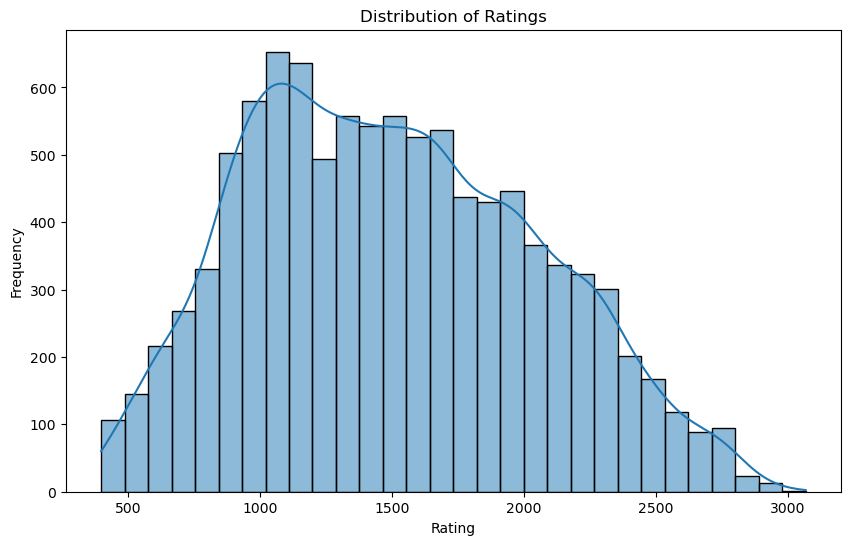

In [19]:
#Ploting the distribution to know whether it is positively of negatively skewed

import matplotlib.pyplot as plt
import seaborn as sns
# EDA: Visualize distribution of the Rating
plt.figure(figsize=(10, 6))
sns.histplot(df_feature_encoded['Rating'], bins=30, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

Normally I am supposed to find the log of the value, but since it checking rating points, and I am using a chunk of my data.. I will leave it this way for now

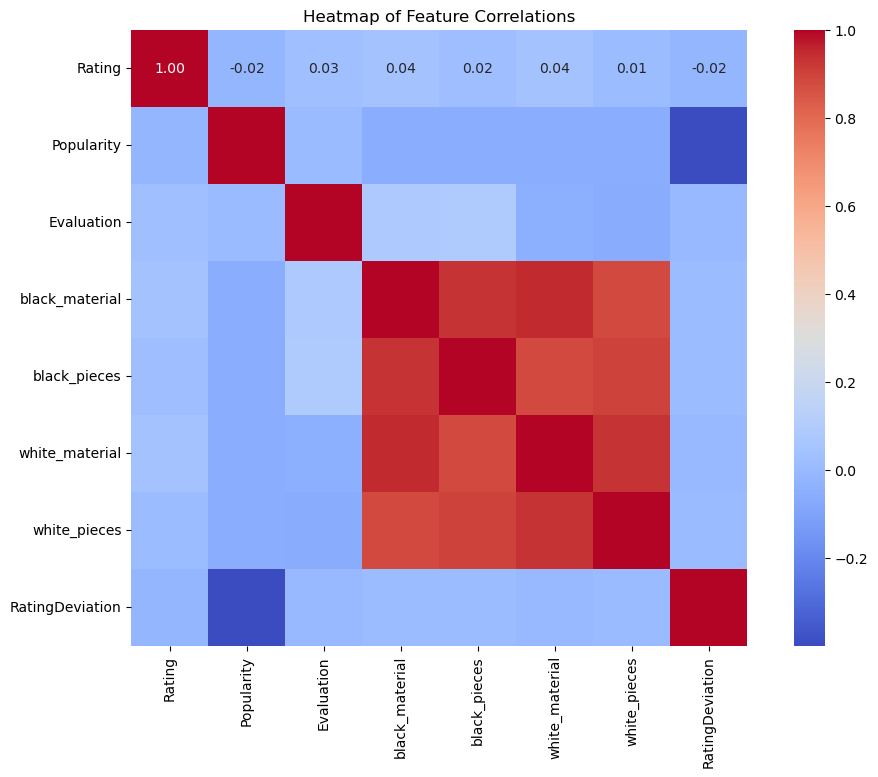

In [20]:
# Assuming df_feature_encoded is your DataFrame
# Compute the correlation matrix
columns_of_interest = ['Rating', 'Popularity', 'Evaluation', 'black_material', 'black_pieces', 'white_material', 'white_pieces','RatingDeviation']
df_subset = df_feature_encoded[columns_of_interest]
corr = df_subset.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)

# Set title
plt.title('Heatmap of Feature Correlations')

# Show the plot
plt.show()

A good number of the features have correlations with each other.. which means my model should be good

C:\Users\begat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\begat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\begat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\begat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

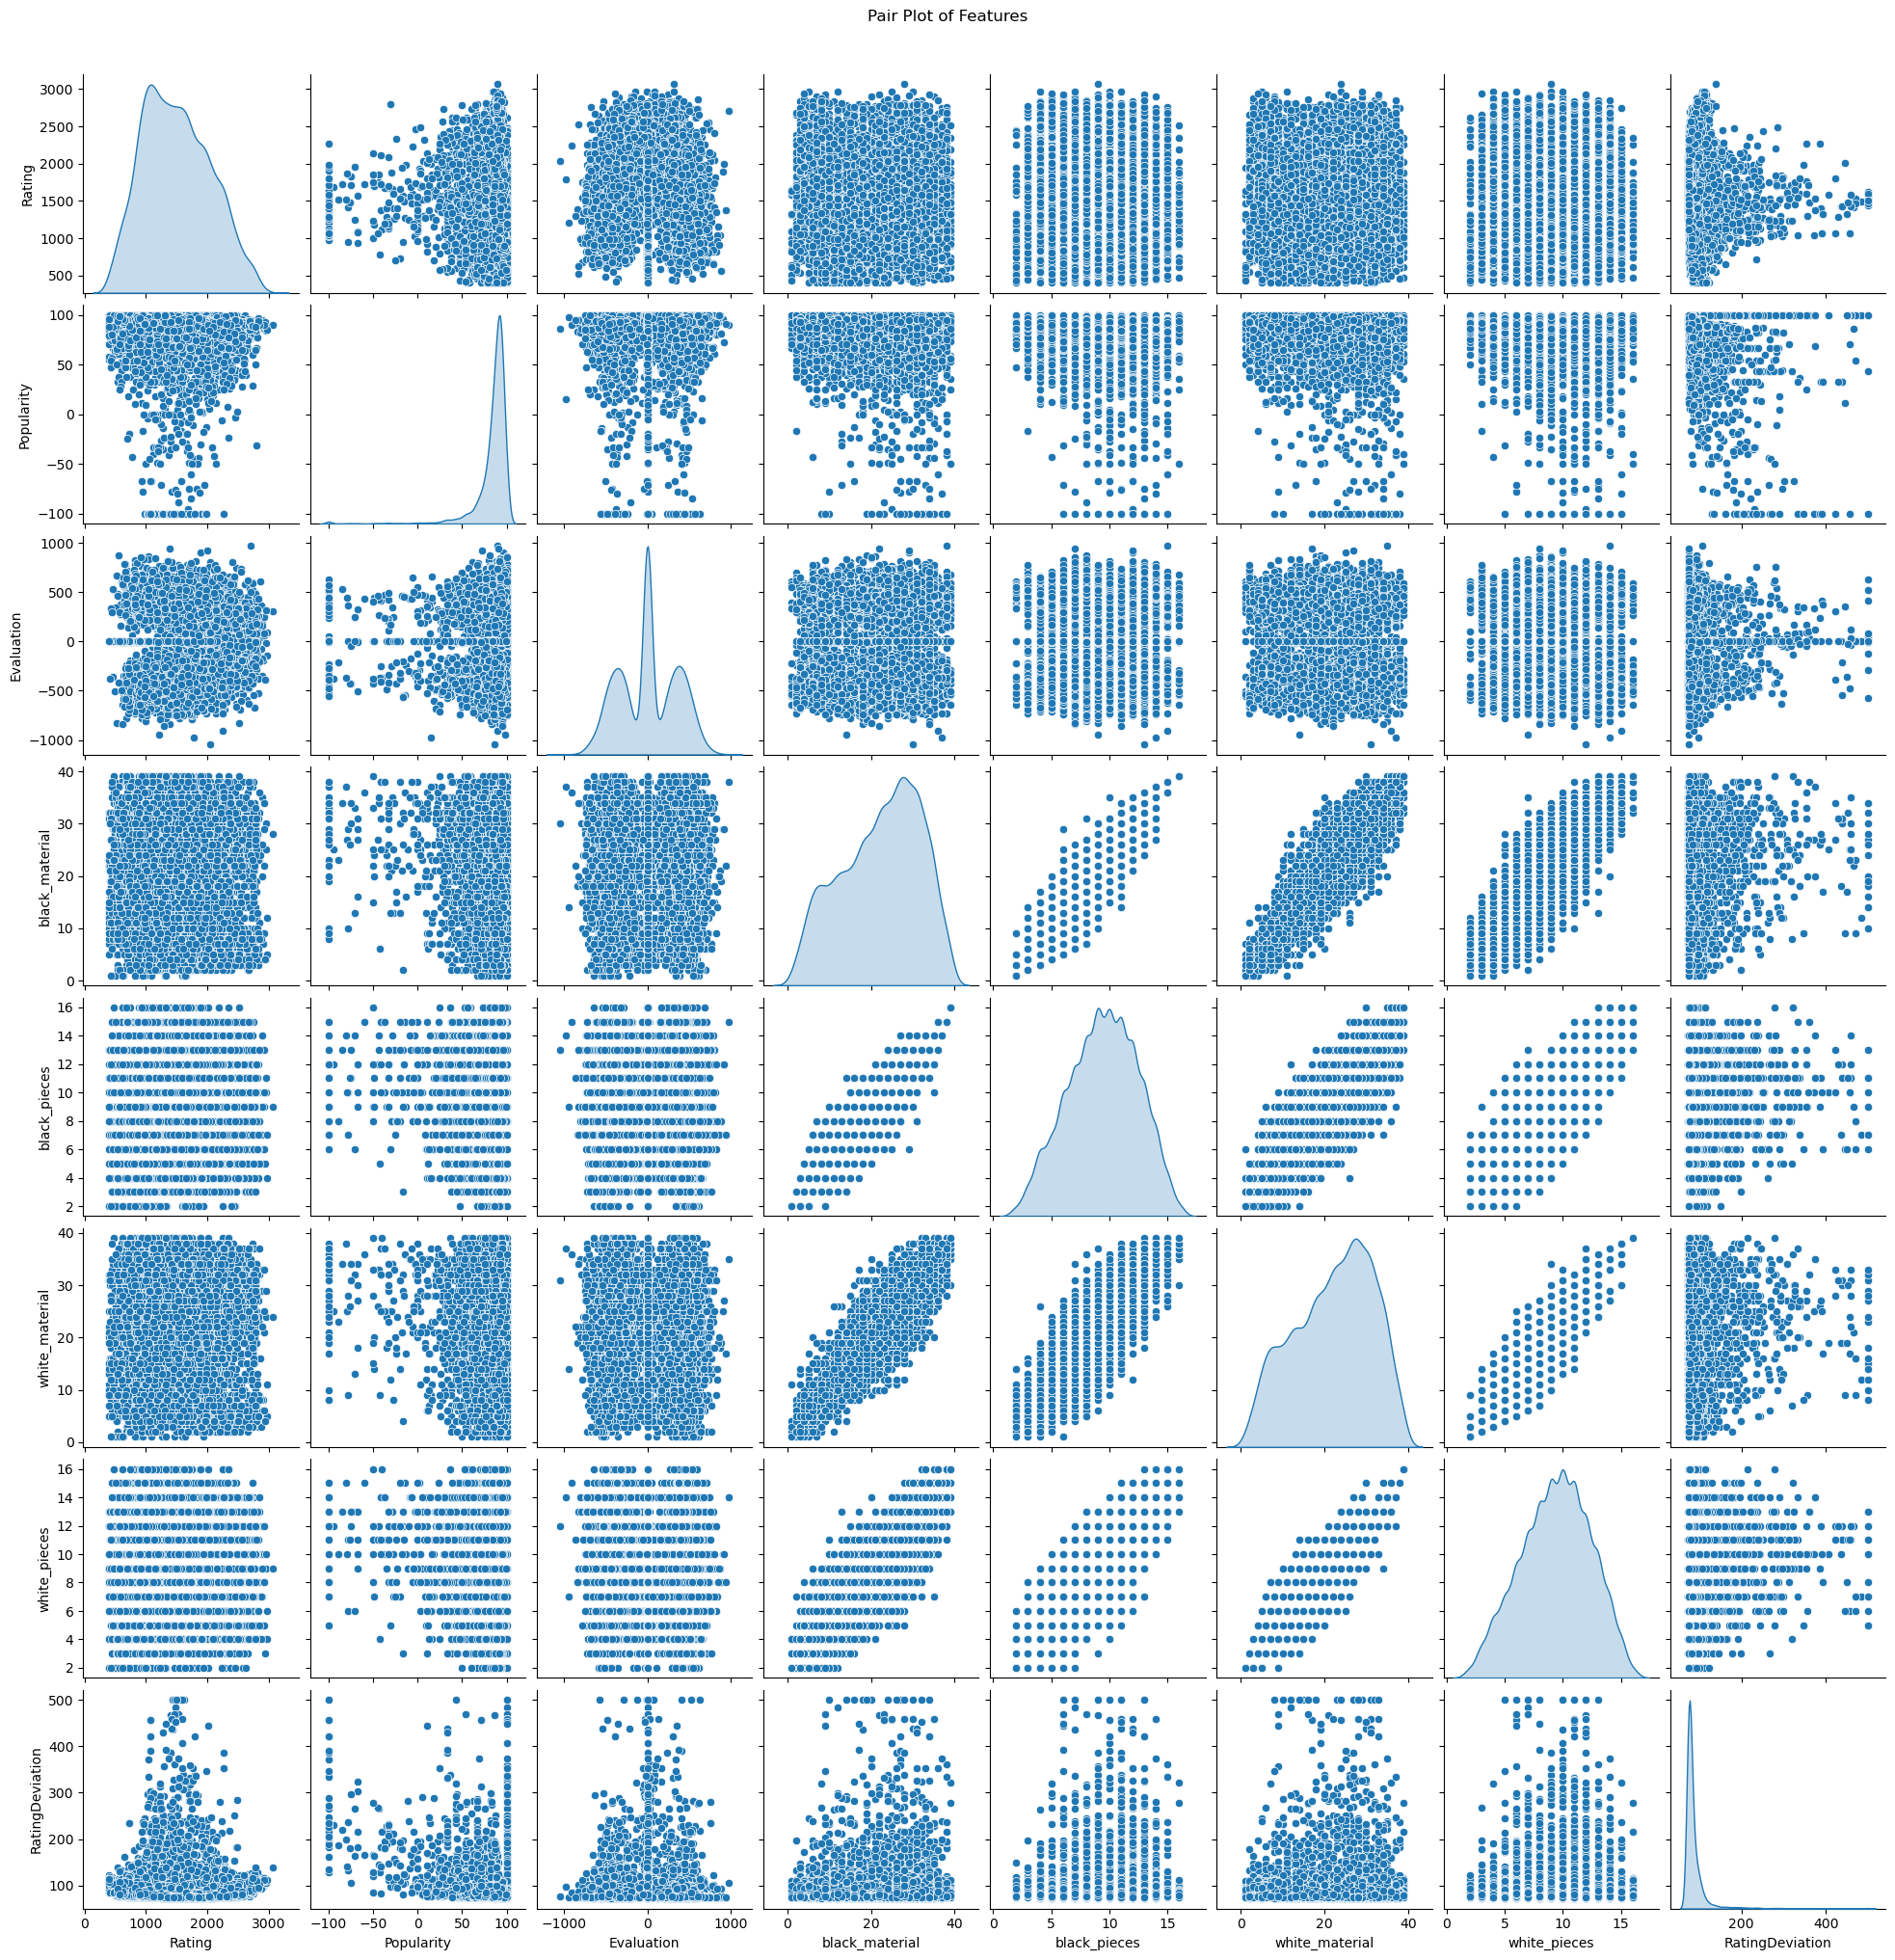

In [21]:
# Creating a pair plot
df_subset = df_feature_encoded[columns_of_interest]
sns.pairplot(df_subset, diag_kind='kde')  # diag_kind='kde' will show density plots on the diagonal
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

In [22]:
# Preparing features and target
X = df_feature_encoded.drop('Rating', axis=1)
y = df_feature_encoded['Rating']

In [23]:
from sklearn.preprocessing import PolynomialFeatures
degree = 2 
poly = PolynomialFeatures(degree)

# Generating polynomial features
X_poly = poly.fit_transform(X)

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42) #This is to get validation data from my train dataset


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Define the model
vanilla_model = Sequential()
vanilla_model.add(Input(shape=(X_train.shape[1],)))  # Input layer
vanilla_model.add(Dense(units=64, activation='relu'))  # Hidden layer
vanilla_model.add(Dense(units=32, activation='relu'))  # Hidden layer
vanilla_model.add(Dense(units=1))  # Output layer (for regression)

# Compile the model
vanilla_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model with validation data
history = vanilla_model.fit(X_train, y_train, epochs=100, batch_size=1, validation_data=(X_val, y_val), verbose=1)

# Evaluate the model on test data
loss, mae = vanilla_model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test MAE: {mae}')

Epoch 1/100
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 707847.0000 - mae: 628.0453 - val_loss: 284462.8750 - val_mae: 401.9170
Epoch 2/100
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 248045.8281 - mae: 372.3402 - val_loss: 249917.8750 - val_mae: 373.6278
Epoch 3/100
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 206591.3438 - mae: 338.3721 - val_loss: 223346.0469 - val_mae: 358.7233
Epoch 4/100
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 170890.2500 - mae: 316.1597 - val_loss: 209876.8125 - val_mae: 351.2789
Epoch 5/100
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 148180.1094 - mae: 299.8688 - val_loss: 204169.2812 - val_mae: 349.0026
Epoch 6/100
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 143369.8125 - mae: 297.5217 - val_loss: 203704.9219 - val_mae: 351.0337
Epoch 7/100
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 133814.9375 - mae: 284.8290 - val_loss: 196467.7656 - val_mae: 344.8427
Epoch 8/100
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 12s 2

6400/6400 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 87351.4609 - mae: 219.0417 - val_loss: 511215.2500 - val_mae: 358.5365
Epoch 50/100
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 85841.5547 - mae: 219.7191 - val_loss: 552961.9375 - val_mae: 358.8304
Epoch 51/100
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 83690.4688 - mae: 216.5784 - val_loss: 588707.3750 - val_mae: 359.4221
Epoch 52/100
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 84011.3672 - mae: 214.0641 - val_loss: 552369.1875 - val_mae: 355.1451
Epoch 53/100
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 83097.4766 - mae: 212.5809 - val_loss: 591563.5625 - val_mae: 359.0496
Epoch 54/100
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 79556.1641 - mae: 209.7609 - val_loss: 646235.3125 - val_mae: 361.4239
Epoch 55/100
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 81550.9844 - mae: 210.4484 - val_loss: 571565.1875 - val_mae: 360.7003
Epoch 56/100
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - lo

6400/6400 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 57947.3750 - mae: 173.3104 - val_loss: 591456.1250 - val_mae: 384.5191
Epoch 98/100
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 59046.4375 - mae: 173.5951 - val_loss: 675277.6250 - val_mae: 378.7802
Epoch 99/100
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 58891.1250 - mae: 174.6072 - val_loss: 638765.8750 - val_mae: 379.2291
Epoch 100/100
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 57868.1055 - mae: 173.6566 - val_loss: 583570.3125 - val_mae: 375.8592
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 210569.3594 - mae: 348.0618  
Test Loss: 226250.25, Test MAE: 349.7377014160156


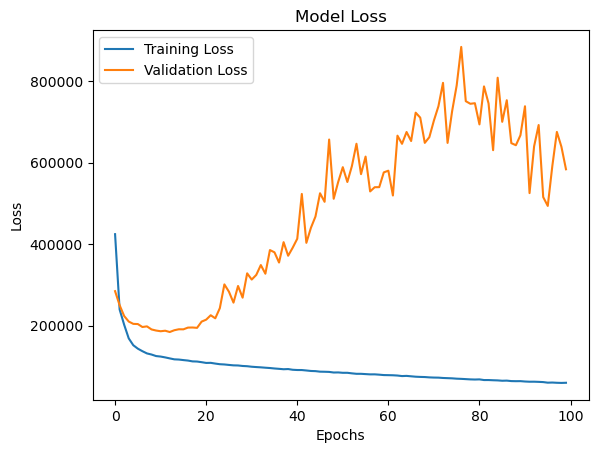

In [27]:
#Plotting the graph to see how my training loss performs against the validation loss to know if my model is over or underfitting
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2237120.2500 - mae: 1396.8179 - val_loss: 564040.3750 - val_mae: 642.2485
Epoch 2/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 346762.4062 - mae: 472.4352 - val_loss: 166556.8906 - val_mae: 325.1215
Epoch 3/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 189691.1562 - mae: 346.9315 - val_loss: 169678.7188 - val_mae: 329.0786
Epoch 4/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 191282.5000 - mae: 349.7326 - val_loss: 169183.2188 - val_mae: 327.8527
Epoch 5/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 187212.4688 - mae: 342.0329 - val_loss: 163178.6562 - val_mae: 325.1732
Epoch 6/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 177697.6875 - mae: 334.7426 - val_loss: 161144.6875 - val_mae: 319.4892
Epoch 7/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 175864.8125 - mae: 331.9088 - val_loss: 166456.3906 - val_mae: 327.6801
Epoch 8/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 172283

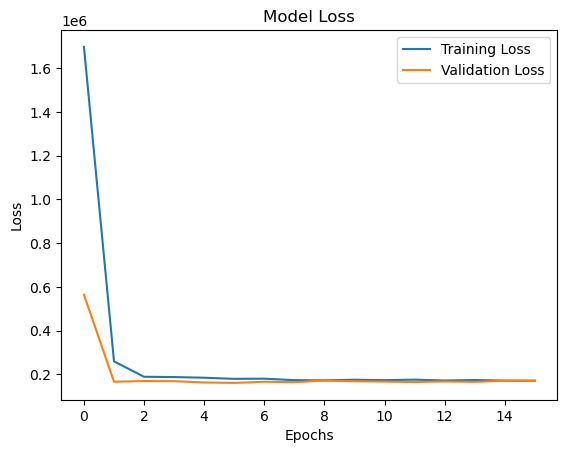

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2  # Import L2 regularizer

# Defining the model
improved_model = Sequential()
improved_model.add(Input(shape=(X_train.shape[1],)))  # Input layer

# First hidden layer with L2 regularization
improved_model.add(Dense(units=128, activation='relu', kernel_regularizer=l2(0.01)))  # L2 regularization added
improved_model.add(BatchNormalization())  
improved_model.add(Dropout(0.3))  # Dropout to prevent overfitting

# Second hidden layer with L2 regularization
improved_model.add(Dense(units=64, activation='relu', kernel_regularizer=l2(0.01)))  # L2 regularization added
improved_model.add(BatchNormalization())  
improved_model.add(Dropout(0.3))

# Third hidden layer with L2 regularization
improved_model.add(Dense(units=32, activation='relu', kernel_regularizer=l2(0.01)))  # L2 regularization added
improved_model.add(BatchNormalization())
improved_model.add(Dropout(0.3))

# Output layer for regression (no activation function since it's regression)
improved_model.add(Dense(units=1))  # Output layer

# Compile the model with Adam optimizer and MSE loss
adam_optimizer = Adam(learning_rate=0.01)
improved_model.compile(optimizer=adam_optimizer, loss='mean_squared_error', metrics=['mae'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with validation data and early stopping
history = improved_model.fit(
    X_train, y_train, 
    epochs=200, 
    batch_size=32,  # Increase batch size for more efficient training
    validation_data=(X_val, y_val), 
    callbacks=[early_stopping],  # Early stopping callback
    verbose=1
)

# Evaluate the improved model on test data
loss, mae = improved_model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test MAE: {mae}')

# Graph to see training and validation loss to check the performance of my model
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


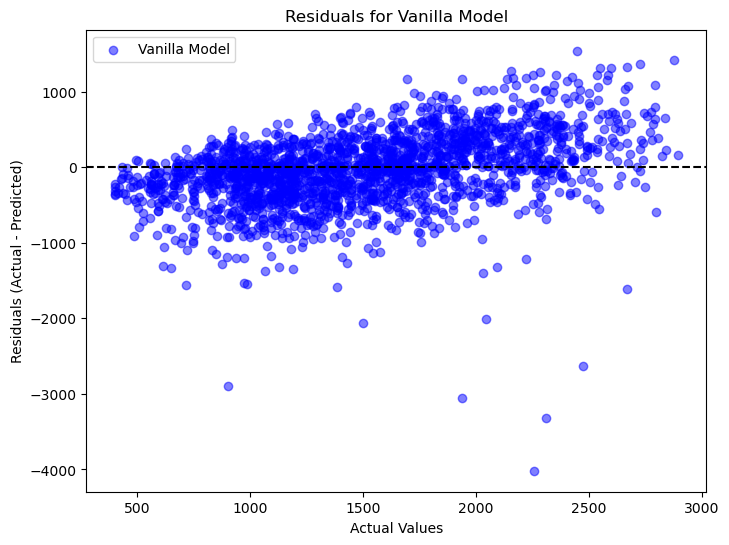

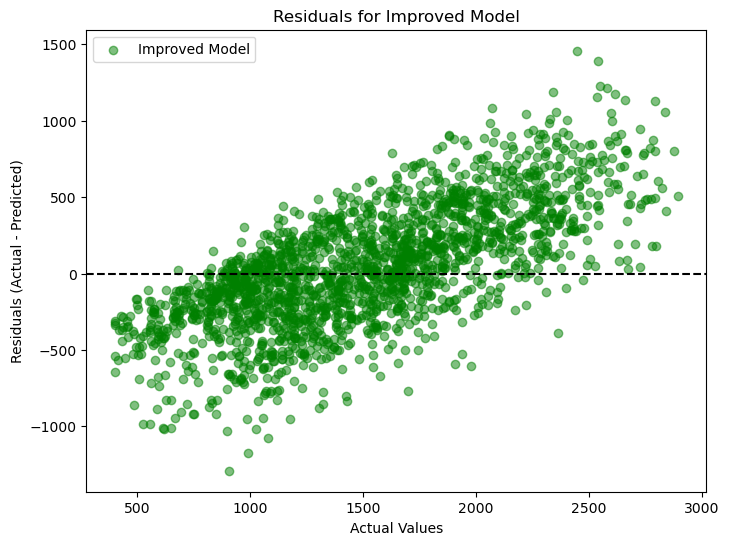

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# predictions for both models
y_pred_vanilla = vanilla_model.predict(X_test)
y_pred_improved = improved_model.predict(X_test)

# Calculate residuals (actual - predicted)
residuals_vanilla = y_test - y_pred_vanilla.flatten()
residuals_improved = y_test - y_pred_improved.flatten()

# Plot residuals for vanilla model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals_vanilla, color='blue', alpha=0.5, label='Vanilla Model')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals for Vanilla Model')
plt.xlabel('Actual Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.legend()
plt.show()

# Plot residuals for improved model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals_improved, color='green', alpha=0.5, label='Improved Model')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals for Improved Model')
plt.xlabel('Actual Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.legend()
plt.show()

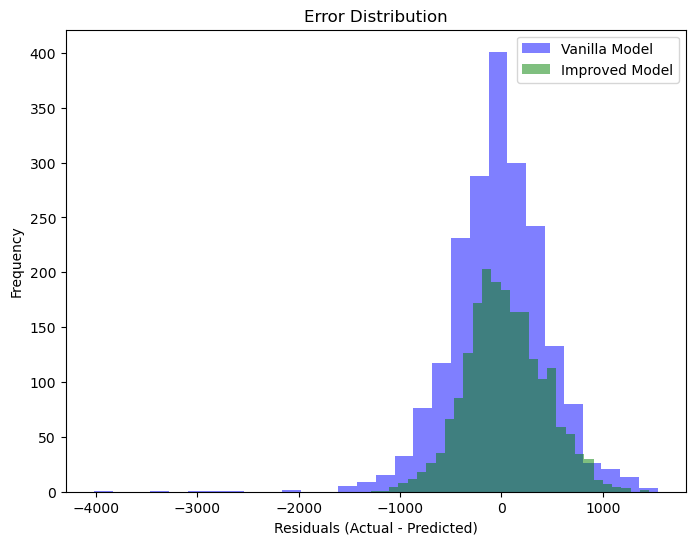

In [30]:
# Plot error distributions for both models
plt.figure(figsize=(8, 6))
plt.hist(residuals_vanilla, bins=30, alpha=0.5, color='blue', label='Vanilla Model')
plt.hist(residuals_improved, bins=30, alpha=0.5, color='green', label='Improved Model')
plt.title('Error Distribution')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluate Vanilla Model
y_pred_vanilla = vanilla_model.predict(X_test)
mae_vanilla = mean_absolute_error(y_test, y_pred_vanilla)
mse_vanilla = mean_squared_error(y_test, y_pred_vanilla)
rmse_vanilla = np.sqrt(mse_vanilla)
r2_vanilla = r2_score(y_test, y_pred_vanilla)

# Evaluate Improved Model
y_pred_improved = improved_model.predict(X_test)
mae_improved = mean_absolute_error(y_test, y_pred_improved)
mse_improved = mean_squared_error(y_test, y_pred_improved)
rmse_improved = np.sqrt(mse_improved)
r2_improved = r2_score(y_test, y_pred_improved)

# Print metrics for Vanilla Model
print("Vanilla Model:")
print(f"Mean Absolute Error (MAE): {mae_vanilla}")
print(f"Mean Squared Error (MSE): {mse_vanilla}")
print(f"Root Mean Squared Error (RMSE): {rmse_vanilla}")
print(f"R-squared (R2): {r2_vanilla}")

# Print metrics for Improved Model
print("\nImproved Model:")
print(f"Mean Absolute Error (MAE): {mae_improved}")
print(f"Mean Squared Error (MSE): {mse_improved}")
print(f"Root Mean Squared Error (RMSE): {rmse_improved}")
print(f"R-squared (R2): {r2_improved}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Vanilla Model:
Mean Absolute Error (MAE): 349.73774685668945
Mean Squared Error (MSE): 226250.23363956434
Root Mean Squared Error (RMSE): 475.6576853574052
R-squared (R2): 0.22597365996118746

Improved Model:
Mean Absolute Error (MAE): 308.66692791748045
Mean Squared Error (MSE): 153031.40135562586
Root Mean Squared Error (RMSE): 391.19228182011193
R-squared (R2): 0.47646314615079244


The Improved Model significantly outperforms the Vanilla Model across all error metrics, with a Mean Absolute Error (MAE) of 308.67 compared to 349.74, a Mean Squared Error (MSE) of 153,031.40 versus 226,250.23, and a Root Mean Squared Error (RMSE) of 391.19 compared to 475.66. Furthermore, the Improved Model captures approximately 47.65% of the variance in the target variable, indicated by its R-squared (R²) value of 0.4765, which is a substantial improvement over the Vanilla Model's 22.60%. These results highlight the effectiveness of the techniques used in the Improved Model, such as the Adam optimizer, dropout, batch normalization, and L2 regularization, leading to enhanced accuracy and generalization. However, the relatively low R² value suggests that further refinement and feature engineering could help improve the model's performance even more.








In [33]:
# Save the vanilla model
vanilla_model.save('vanilla_model.keras')

# Save the improved model
improved_model.save('improved_model.keras')